In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

In [11]:
#載入數據集
diabetes = load_diabetes() 

#使用diabetes.data 獲得數據集
#使用diabetes.target 獲得目標
#使用diabetes.feature_names 獲得特徵名稱

#數據集變成dataframe 特徵為diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

print(df_diabetes.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  


# **<數據集解釋>**
age：年齡  
sex：性别（0 = 男性，1 = 女性）  
bmi：體重/身高平方(米)  
bp：收縮壓  

s1：第一次血清胰島素測量（單位為微克/L）  
s2：第二次血清胰島素測量（單位為微克/L）  
s3：第三次血清胰島素測量（單位為微克/L）  
s4：第四次血清胰島素測量（單位為微克/L）  
s5：第五次血清胰島素測量（單位為微克/L）  
s6：第六次血清胰島素測量（單位為微克/L）  

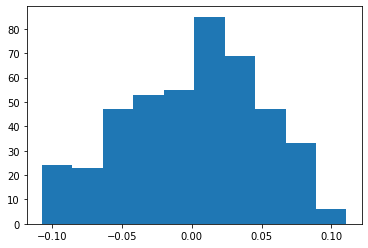

In [13]:
# Plot a histogram of the "age" feature
plt.hist(diabetes.data[:, 0])

# Show the plot
plt.show()

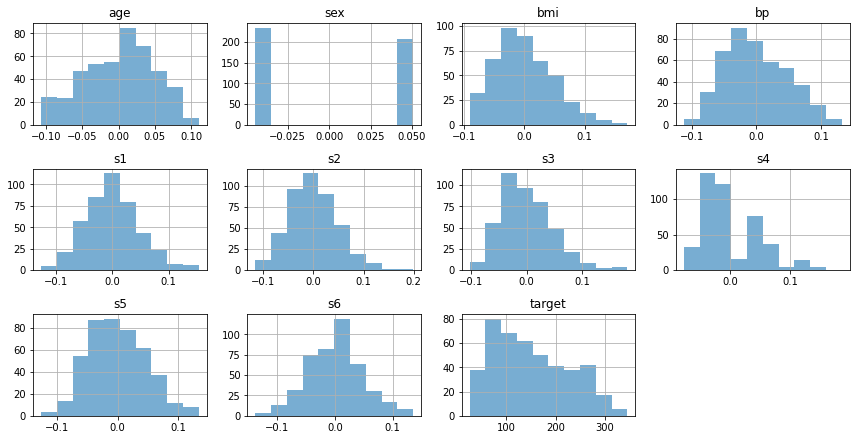

In [23]:
#直方圖 histograms

#alpha不透明度
#bins條型的數量 (越多越細)
df_diabetes.hist(alpha=0.6,layout=(4,4), figsize=(12, 8), bins=10) 
plt.tight_layout()
plt.show()

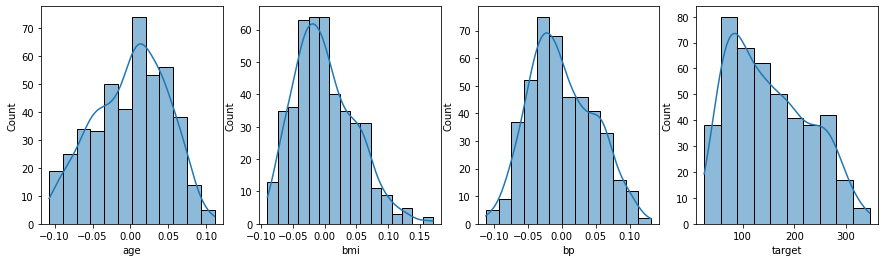

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.histplot(df_diabetes["age"][:],ax=axes[0], kde=True)
sns.histplot(df_diabetes["bmi"][:],ax=axes[1], kde=True)
sns.histplot(df_diabetes["bp"][:],ax=axes[2], kde=True)
sns.histplot(df_diabetes["target"][:],ax=axes[3], kde=True)

'''
觀察資料狀況

'''

In [26]:
sns.pairplot(df_diabetes, hue="target", height=4, diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

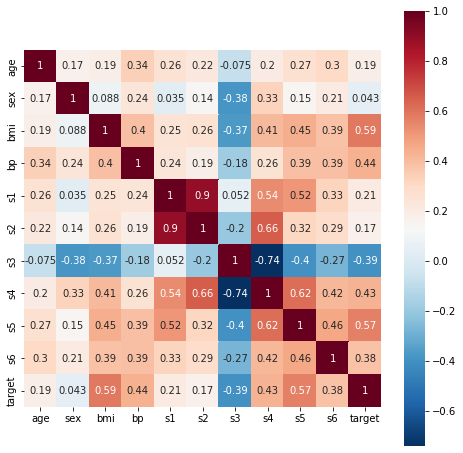

In [25]:
# correlation 計算
corr = df_diabetes[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','target']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

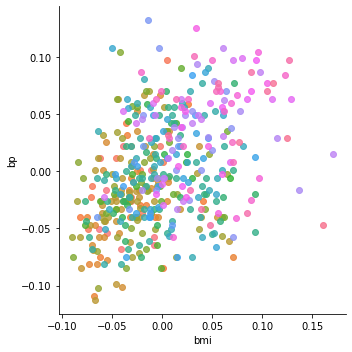

In [38]:
sns.lmplot(x = "bmi", y = "bp", hue='target', data=df_diabetes, fit_reg=False, legend=False)

plt.legend(title='target', loc='upper right', labels=['target'])

#叫不出colorbar

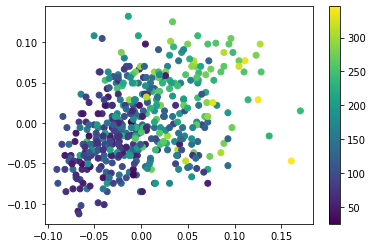

In [42]:
df_diabetes['target'] = diabetes.target

# Create a scatterplot using matplotlib's scatter function
plt.scatter(x = df_diabetes["bmi"], y = df_diabetes["bp"], c=df_diabetes["target"])

# Add a colorbar using matplotlib's colorbar function
plt.colorbar()

# Show the plot
plt.show()

In [48]:
print(df_diabetes.describe())
print(df_diabetes.shape)
print(df_diabetes.info())
#觀察資料已經做過標準化

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [51]:
from sklearn.model_selection import train_test_split

X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [52]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [53]:
from sklearn.linear_model import LinearRegression

lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
predictions = lig_reg.predict(X_test)

In [56]:

#評估模型效能
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2712.5059132959414
Root Mean Squared Error: 52.0817234094259
Mean Absolute Error: 41.5111889381235


相對平均絕對誤差（Relative Mean Absolute Error，RMAE）是衡量回歸模型性能的一種測量方法。它是平均絕對誤差（Mean Absolute Error，MAE）的比值，表示預測值與真實值之差的絕對值的平均值佔真實值的均值的百分比。

公式為：RMAE = MAE / mean(y)

其中，mean(y) 是真實值的均值。

RMAE 的取值範圍是 0 到無窮大。較小的 RMAE 值表示模型的性能較好。

例如，如果 RMAE 的值小於 0.1，則表示模型的性能較好；如果 RMAE 的值大於 0.5，則表示模型的性能較差。

通常來說，在回歸問題中，使用 RMAE 來評估模型的性能是比較可靠的方法。


In [57]:
#加入RMAE評估

mean_y = np.mean(y_test)
rmae = mae / mean_y
rmae

0.2633658265963068